# Test scripts

In [ ]:
import sys

print(sys.version)

                                              ..-
    PyKat 1.2.81          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat

--------------------------------------------------------------
Running kat - Started at 2022-05-02 18:24:39.551699
Used Finesse 2.3.1 at finesse_linux/kat

Finished in 0.0553725 seconds


100% | ETA:  0:00:00 | Saving data                                                                                                                                                                                                         

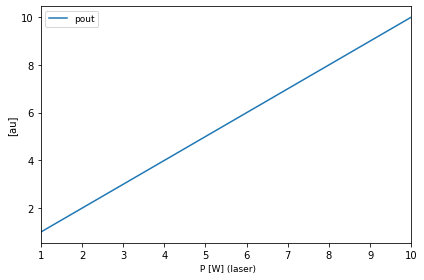

In [1]:
from pykat import finesse
from pykat.commands import *

kat = finesse.kat()
code = """
l laser 1 0 n1
s space 1 n1 n2
pd pout n2
xaxis laser P lin 1 10 100
"""
kat.parse(code)
out = kat.run()
out.plot()

# Explained Power Sweep Example

![](images/cavity-powersweep.png)

## Finesse2 basics

* Finesse uses **nodes** to connect components
* `xaxis` is used to modulate (and plot) any value
    * in this case we change the power output of the `laser` component

--------------------------------------------------------------
Running kat - Started at 2022-05-02 18:50:15.359275
Used Finesse 2.3.1 at finesse_linux/kat

Finished in 0.0136375 seconds


 91% | ETA:  0:00:00 | Calculating                                                                                                                                                                                                         

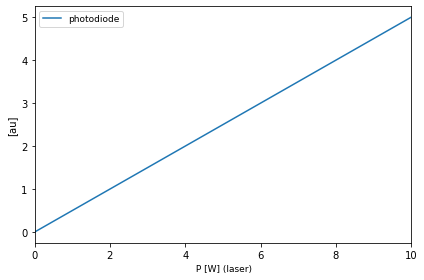

In [2]:
from pykat import finesse
from pykat.commands import *

kat = finesse.kat()
code = """
l laser 1 0 node0
s space 1 node0 node1
m mirror 0.5 0.5 0 node1 node2
pd photodiode node2

xaxis laser P lin 0 10 10
"""
kat.parse(code)
out = kat.run()
out.plot()

## code deep dive

* `l laser 1 0 node0`
    * `l` laser
    * `laser` name of component
    * `1` P (power in Watts)
    * `0` frequency offset
    * no phase (optional)
    * `node0` connected node
* `s space 1 node0 node1`
    * `s` free space
    * `space` component name
    * `1` length (in meters)
    * optional index of refraction (default 1)
    * `node0` `node1` connected nodes
* `m mirror 0.5 0.5 0 node1 node2`
    * `m` mirror
    * `mirror` component name
    * `0.5` R (reflectivity)
    * `0.5` T (power transmission)
    * `0` phi (tuning in degrees)
    * `node1 node2` connected nodes
* `pd photodiode node2`
    * `pd` photo-diode
    * `photodiode` component name
    * `n2` connected node
* `xaxis l1 P lin 0 10 10`
    * x-axis definition (parameter to tune)
    * `l1` component to tune
    * `P` parameter of component to tune
    * `lin` linear
    * `0` from (Watts)
    * `10` to (Watts)
    * steps